<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/Travel_Judge_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
!pip install --upgrade langchain langchain_google_genai langgraph tavily-python langchain_community langchain_core



In [2]:
import os
from google.colab import userdata
Gemnai_api_key = userdata.get('GOOGLE_API_KEY')
tavily_api_key = userdata.get("Tavily_Api_Key")
os.environ["Tavily_Api_Key"] = "Tavily_Api_Key"

from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI (
    model = "gemini-pro",  # Changed the model name to a valid model identifier
    api_key = Gemnai_api_key
)
llm.invoke("i am hafiz naveed uddin from karachi")

AIMessage(content="Hello Hafiz Naveed Uddin from Karachi! It's nice to meet you. I hope you are having a wonderful day. If you have any questions or need any assistance, please don't hesitate to ask. I'm here to help.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-9e29b57d-39f3-4094-9bd8-c117a4bfc877-0', usage_metadata={'input_tokens': 12, 'output_tokens': 52, 'total_tokens': 64, 'input_token_details': {'cache_read': 0}})

In [3]:
LANGCHAIN_API_KEY = userdata.get('memory-enabled-agent')  # LangSmith API key

# Configure environment variables for LangChain and LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"  # Enable LangSmith tracing
os.environ["LANGCHAIN_PROJECT"] = "memory-enabled-agent"  # Set LangSmith project name
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY  # Set LangSmith API key


In [4]:
import os
from google.colab import userdata

# ... (other imports)

# Get the Tavily API key
tavily_api_key = userdata.get("Tavily_Api_Key")

# Set the environment variable with the actual API key value
os.environ["TAVILY_API_KEY"] = tavily_api_key  # Use correct environment variable name

# ... (other code)

from langchain_community.tools.tavily_search import TavilySearchResults

# Initialize the tool with the API key
# Using the environment variable, no need to pass it directly
tool = TavilySearchResults(max_results=2)
# Alternatively, pass directly: tool = TavilySearchResults(tavily_api_key=tavily_api_key, max_results=2)

tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [7]:
# d   """
#     Calculates the compensation amount for travel delays.

#     Args:
#         delay_hours (float): The number of hours the travel was delayed.
#         ticket_cost (float): The cost of the ticket in USD.
#         inconvenience_level (str): The level of inconvenience caused ('low', 'medium', 'high').

#     Returns:
#         str: A string with the calculated compensation amount.
#     """
#     base_compensation = 0.0

#     # Calculate base compensation based on delay hours
#     if delay_hours > 0 and delay_hours <= 2:ef calculate_compensation(delay_hours: float, ticket_cost: float, inconvenience_level: str) -> str:

#         base_compensation = ticket_cost * 0.25
#     elif delay_hours > 2 and delay_hours <= 5:
#         base_compensation = ticket_cost * 0.5
#     elif delay_hours > 5:
#         base_compensation = ticket_cost * 0.75

#     # Adjust compensation based on inconvenience level
#     if inconvenience_level.lower() == "high":
#         base_compensation += 100  # Additional for high inconvenience
#     elif inconvenience_level.lower() == "medium":
#         base_compensation += 50  # Additional for medium inconvenience

#     # Ensure compensation is fair and within ticket cost
#     if base_compensation > ticket_cost:
#         base_compensation = ticket_cost

#     return f"The calculated compensation is ${base_compensation:.2f}."

# def check_refund_eligibility(ticket_cost: float, cancellation_reason: str) -> str:
#     """
#     Determines if a customer is eligible for a refund based on the cancellation reason.

#     Args:
#         ticket_cost (float): The cost of the ticket in USD.
#         cancellation_reason (str): The reason for the cancellation (e.g., 'medical emergency', 'flight cancellation').

#     Returns:
#         str: A string indicating whether the customer is eligible for a refund.
#     """
#     eligible_reasons = ["medical emergency", "flight cancellation", "overbooking"]
#     if cancellation_reason.lower() in eligible_reasons:
#         return f"The customer is eligible for a full refund of ${ticket_cost:.2f}."
#     else:
#         return "The customer is not eligible for a refund based on the given reason."

# def legal_case_evaluation(case_details: str) -> str:
#     """
#     Evaluates the legal strength of a travel-related case based on provided details.

#     Args:
#         case_details (str): A description of the case including relevant facts and issues.

#     Returns:
#         str: A string with a legal recommendation or analysis of the case's strength.
#     """
#     if "delay" in case_details.lower() and "no compensation" in case_details.lower():
#         return "The case has a strong basis for legal escalation due to lack of compensation for delays."
#     elif "lost baggage" in case_details.lower():
#         return "The case has moderate legal strength for compensation claims due to lost baggage."
#     elif "overbooking" in case_details.lower():
#         return "The case is strong and should be pursued for compensation due to overbooking."
#     else:
#         return "The case details are unclear. Recommend gathering more evidence."

# def calculate_airline_penalty(delay_hours: float, passenger_count: int) -> str:
#     """
#     Calculates the penalty that should be imposed on an airline for delays.

#     Args:
#         delay_hours (float): The total hours of delay caused by the airline.
#         passenger_count (int): The total number of passengers affected.

#     Returns:
#         str: A string with the calculated penalty amount.
#     """
#     penalty_per_hour = 50  # Base penalty per passenger per hour of delay
#     total_penalty = delay_hours * passenger_count * penalty_per_hour

#     return f"The airline should be fined a total of ${total_penalty:.2f} for the delay."
# tools = [calculate_compensation, check_refund_eligibility, legal_case_evaluation, calculate_airline_penalty]
# llm_with_tools = llm.bind_tools(tools)

In [8]:
llm_with_tools = llm.bind_tools(tools)

In [9]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7c25a5aad330>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'calculate_compensation', 'description': "Calculates the compensation amount for travel delays.\n\nArgs:\n    delay_hours (float): The number of hours the travel was delayed.\n    ticket_cost (float): The cost of the ticket in USD.\n    inconvenience_level (str): The level of inconvenience caused ('low', 'medium', 'high').\n\nReturns:\n    str: A string with the calculated compensation amount.", 'parameters': {'type_': 6, 'description': "Calculates the compensation amount for travel delays.\n\nArgs:\n    delay_hours (float): The number of hours the travel was delayed.\n    ticket_cost (float): The cost of the ticket in USD.\n    inconvenience_level (str): The level of incon

In [10]:
from langgraph.graph import START, END , StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import  MessagesState
from langgraph.checkpoint.memory import MemorySaver
memory: MemorySaver = MemorySaver()
# Define LLM function for the graph
def llm(state: MessagesState) -> MessagesState:
  # ek assistant bnaya jis ki state ma sub record moujod ha uski type msgstate ha jo state k under tmam msg ki state ha
   return {"messages": [llm_with_tools.invoke( state["messages"])]}


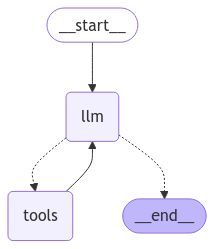

In [11]:
builder: StateGraph = StateGraph(MessagesState)
builder.add_node("llm", llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm")
builder.add_conditional_edges("llm", tools_condition)
builder.add_edge("tools", "llm")

# Compile the graph
graph: CompiledStateGraph = builder.compile(checkpointer=memory)

# Display graph
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [12]:
from langchain.schema import HumanMessage

# Configuration for the test
config1 = {"configurable": {"thread_id": "1"}}

In [14]:
def stream_graph_updates(user_input: str):
    # Configuration for the stream - provide necessary keys for checkpointer
    config = {"configurable": {"thread_id": "1"}}
    for event in graph.stream({"messages": [("user", user_input)]}, config=config):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hello
Assistant: Hi there! How can I help you today?
User: what is langgraph?
Assistant: Langgraph is a large language model, trained by Google. I am a conversational AI, also trained by Google, and I am here to help you with a wide range of language-related tasks. For example, I can help you with translation, summarization, question answering, and dialogue generation.
User: what is langchain?
Assistant: LangChain is a multimodal AI model, also developed by Google, that combines the power of language and code. It can understand and generate both natural language and programming code, and it can be used for a variety of tasks, such as code translation, code summarization, and code generation.
User: do u know about rebotic agentic AI?
Assistant: Yes, I am aware of robotic agent AI. Robotic agent AI is a type of artificial intelligence that is used to control robots. It allows robots to perceive their environment, make decisions, and take actions in order to achieve their goals. Rob

In [15]:
messages = graph.invoke({"messages": [HumanMessage(content="Calculate compensation for a delay of 3 hours with a ticket cost of $200 and high inconvenience.")]},config1)
for m in messages['messages']:
    m.pretty_print()



================================ Human Message =================================

Calculate compensation for a delay of 3 hours with a ticket cost of $200 and high inconvenience.
================================== Ai Message ==================================
Tool Calls:
  calculate_compensation (98455984-5450-44ba-b8ac-db582a16f052)
 Call ID: 98455984-5450-44ba-b8ac-db582a16f052
  Args:
    inconvenience_level: high
    ticket_cost: 200.0
    delay_hours: 3.0
================================= Tool Message =================================
Name: calculate_compensation

The calculated compensation is $200.00.
================================== Ai Message ==================================

The calculated compensation is $200.00.
================================ Human Message =================================

hello
================================== Ai Message ==================================

Hi there! How can I help you today?
================================ Human Message =========

In [ ]:
config2 = {"configurable": {"thread_id": "2"}}

In [ ]:
messages = graph.invoke({"messages": [HumanMessage(content="Ek case evaluate karo jisme flight overbook hui thi aur airline ne passenger ka refund dene se inkar kar diya. plz reply in romen urdu")]},config2)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ek case evaluate karo jisme flight overbook hui thi aur airline ne passenger ka refund dene se inkar kar diya.
================================== Ai Message ==================================
Tool Calls:
  legal_case_evaluation (d151d073-e6a4-4156-ba06-465dbc735d3f)
 Call ID: d151d073-e6a4-4156-ba06-465dbc735d3f
  Args:
    case_details: Flight overbooking and airline refusal to refund.
================================= Tool Message =================================
Name: legal_case_evaluation

The case is strong and should be pursued for compensation due to overbooking.
================================== Ai Message ==================================

Case details mein flight overbooking aur airline dwara refund dene se inkar kiya gaya hai. Is case mein compensation milne ke chances strong hain.  Aapko apne ticket ke liye refund mil sakta hai aur iske alawa airline se additional compensation bhi mil sakta

In [ ]:
messages = graph.invoke({"messages": [HumanMessage(content="Ek case evaluate karo jisme ek passenger ka handbag flight ke dauran kho gaya tha, aur usme valuable items thi. Airline ne isko chori mana aur koi action nahi liya.")]},config2)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ek case evaluate karo jisme flight overbook hui thi aur airline ne passenger ka refund dene se inkar kar diya.
================================== Ai Message ==================================
Tool Calls:
  legal_case_evaluation (d151d073-e6a4-4156-ba06-465dbc735d3f)
 Call ID: d151d073-e6a4-4156-ba06-465dbc735d3f
  Args:
    case_details: Flight overbooking and airline refusal to refund.
================================= Tool Message =================================
Name: legal_case_evaluation

The case is strong and should be pursued for compensation due to overbooking.
================================== Ai Message ==================================

Case details mein flight overbooking aur airline dwara refund dene se inkar kiya gaya hai. Is case mein compensation milne ke chances strong hain.  Aapko apne ticket ke liye refund mil sakta hai aur iske alawa airline se additional compensation bhi mil sakta

In [ ]:
config3 = {"configurable": {"thread_id": "3"}}

In [ ]:
messages = graph.invoke({"messages": [HumanMessage(content="Ek case evaluate karo jisme ek passenger ki flight ke dauran death hui, aur family ka kehna hai ke death airline ki negligence ki wajah se hui hai.?")]},config3)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ek case evaluate karo jisme ek passenger ki flight ke dauran death hui, aur family ka kehna hai ke death airline ki negligence ki wajah se hui hai.?
================================== Ai Message ==================================
Tool Calls:
  legal_case_evaluation (f949b2da-4ae7-422d-a7e0-990c8ac2a10a)
 Call ID: f949b2da-4ae7-422d-a7e0-990c8ac2a10a
  Args:
    case_details: A passenger died during a flight, and the family claims the death was due to airline negligence.
================================= Tool Message =================================
Name: legal_case_evaluation

The case details are unclear. Recommend gathering more evidence.
================================== Ai Message ==================================

Case details ke bina koi legal recommendation dena mushkil hai.  Family ko airline ke khilaf case file karne se pehle saare evidence, jaise medical reports, flight records aur eyewitness

In [ ]:
messages = graph.invoke({"messages": [HumanMessage(content="Passenger ki death ke liye airport security zimmedar lagti hai. Family ko security footage, witnesses, aur medical reports ka proof jama karna hoga. Compensation aur accountability ke liye legal action lena zaroori hai.?")]},config3)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ek case evaluate karo jisme ek passenger ki flight ke dauran death hui, aur family ka kehna hai ke death airline ki negligence ki wajah se hui hai.?
================================== Ai Message ==================================
Tool Calls:
  legal_case_evaluation (f949b2da-4ae7-422d-a7e0-990c8ac2a10a)
 Call ID: f949b2da-4ae7-422d-a7e0-990c8ac2a10a
  Args:
    case_details: A passenger died during a flight, and the family claims the death was due to airline negligence.
================================= Tool Message =================================
Name: legal_case_evaluation

The case details are unclear. Recommend gathering more evidence.
================================== Ai Message ==================================

Case details ke bina koi legal recommendation dena mushkil hai.  Family ko airline ke khilaf case file karne se pehle saare evidence, jaise medical reports, flight records aur eyewitness

In [ ]:
messages = graph.invoke({"messages": [HumanMessage(content="  Agar airport security ke procedures aur protocols ke documents accessible na ho aur airport authority woh share karne se mana kar rahi ho, to family case kaise mazboot bana sakti hai?  ?")]},config3)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ek case evaluate karo jisme ek passenger ki flight ke dauran death hui, aur family ka kehna hai ke death airline ki negligence ki wajah se hui hai.?
================================== Ai Message ==================================
Tool Calls:
  legal_case_evaluation (f949b2da-4ae7-422d-a7e0-990c8ac2a10a)
 Call ID: f949b2da-4ae7-422d-a7e0-990c8ac2a10a
  Args:
    case_details: A passenger died during a flight, and the family claims the death was due to airline negligence.
================================= Tool Message =================================
Name: legal_case_evaluation

The case details are unclear. Recommend gathering more evidence.
================================== Ai Message ==================================

Case details ke bina koi legal recommendation dena mushkil hai.  Family ko airline ke khilaf case file karne se pehle saare evidence, jaise medical reports, flight records aur eyewitness

In [ ]:
messages = graph.invoke({"messages": [HumanMessage(content="Agar family ne public records request, witness testimony, aur expert testimony jama kar li hai, lekin airport authority ab bhi cooperate nahi kar rahi, toh next legal step kya hona chahiye taake case solve ho aur compensation mil sake?.?")]},config3)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ek case evaluate karo jisme ek passenger ki flight ke dauran death hui, aur family ka kehna hai ke death airline ki negligence ki wajah se hui hai.?
================================== Ai Message ==================================
Tool Calls:
  legal_case_evaluation (f949b2da-4ae7-422d-a7e0-990c8ac2a10a)
 Call ID: f949b2da-4ae7-422d-a7e0-990c8ac2a10a
  Args:
    case_details: A passenger died during a flight, and the family claims the death was due to airline negligence.
================================= Tool Message =================================
Name: legal_case_evaluation

The case details are unclear. Recommend gathering more evidence.
================================== Ai Message ==================================

Case details ke bina koi legal recommendation dena mushkil hai.  Family ko airline ke khilaf case file karne se pehle saare evidence, jaise medical reports, flight records aur eyewitness